In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

game_sales = pd.read_csv('top100videogamesales.csv')

sns.set_theme(palette='pastel')

In [2]:
game_sales.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


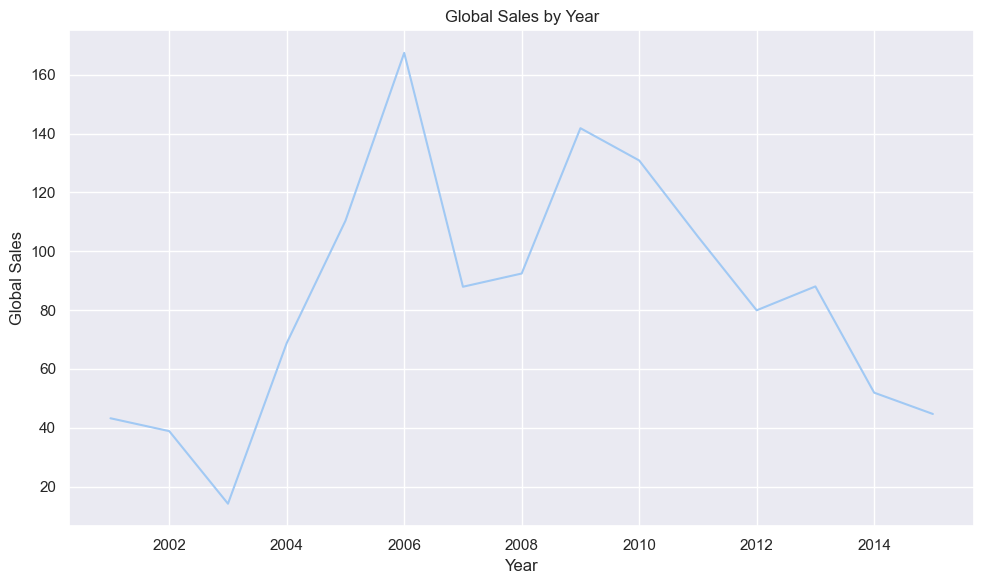

In [3]:
year_and_gsales = game_sales.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_and_gsales)
plt.ylabel('Global Sales')
plt.title('Global Sales by Year')
plt.tight_layout()
plt.show()

## GLOBAL SALES BY YEAR

Global sales were the highest in 2006 with 170, the next highest year in sales was 2009 with just over 140.
___

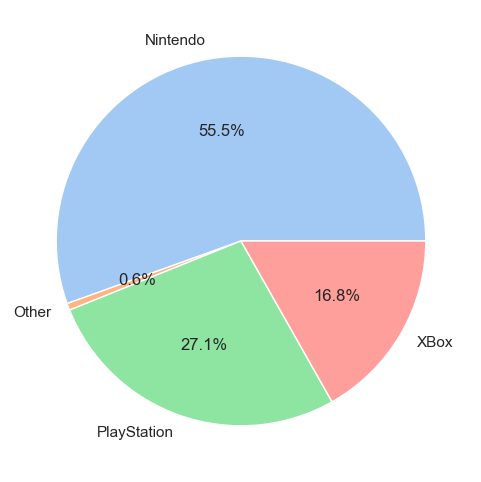

In [4]:
plats_and_gsales = game_sales.groupby('Platform')['Global_Sales'].sum()

total_global_sales = game_sales['Global_Sales'].sum()

plat_percentages = ((plats_and_gsales / total_global_sales) * 100).round(1)

plt.figure(figsize=(6, 6))
plt.pie(plat_percentages, labels=plat_percentages.index, autopct='%1.1f%%')
plt.show()

## WHAT PERCENTAGE OF GLOBAL SALES DOES PLAYSTATION HAVE?

We can see from the chart that PlayStation holds 27.1% of global sales compared to the other platforms in the dataset.
___

<Figure size 1000x600 with 0 Axes>

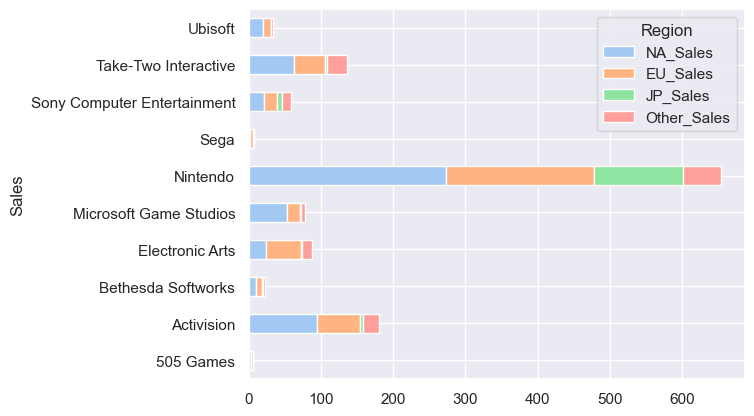

In [5]:
publisher_df = game_sales.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(10, 6))
publisher_df.plot(kind='barh', stacked=True)
plt.ylabel('Sales')
plt.legend(title='Region')
plt.show()

## REGIONAL SALES BY PUBLISHER

As seen in this chart (or not seen regarding poor Sega & 505) Nintendo has successfully bonked all the other Publishers noggins.
___

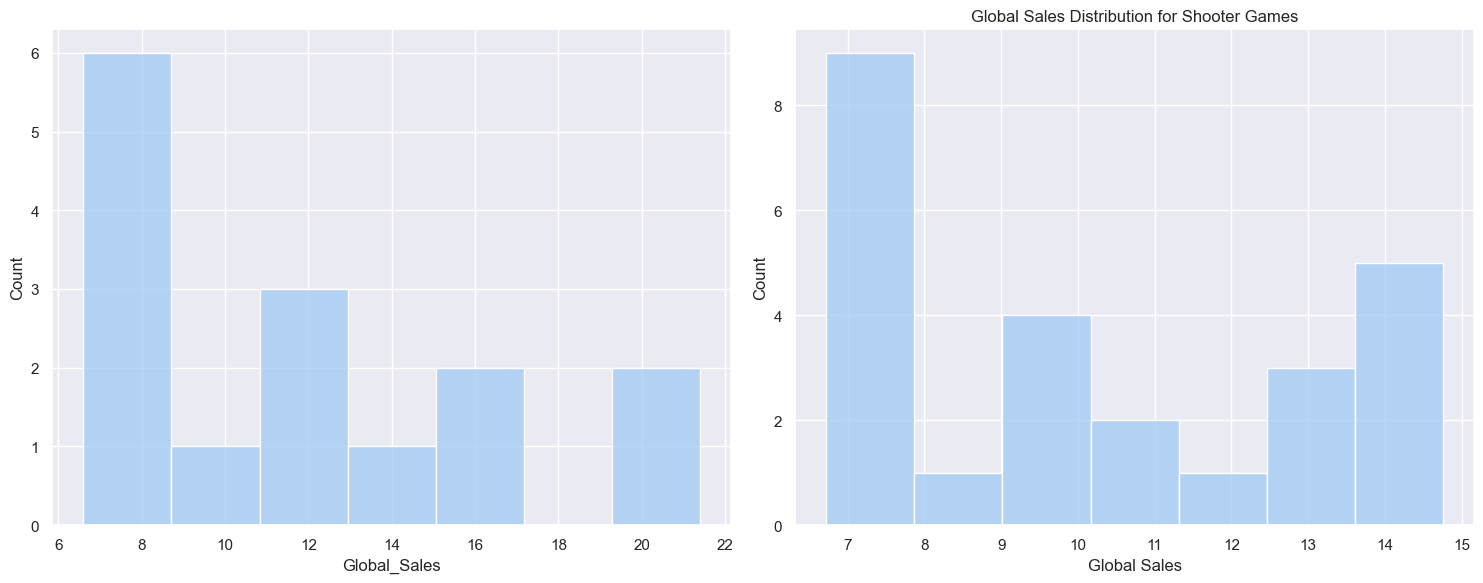

In [6]:
only_action = game_sales[game_sales['Genre'] == 'Action']
only_shooters = game_sales[game_sales['Genre'] == 'Shooter']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=only_action, x='Global_Sales', bins=7, ax=axes[0])
plt.title('Global Sales Distribution for Action Games')
plt.xlabel('Global Sales')

sns.histplot(data=only_shooters, x='Global_Sales', bins=7, ax=axes[1])
plt.title('Global Sales Distribution for Shooter Games')
plt.xlabel('Global Sales')
plt.tight_layout()
plt.show()

## GLOBAL SALES DISTRIBUTION FOR ACTION & SHOOTER GAMES

Most Action games hit between 7-9 in global sales with two hitting 16-17 and two hitting 20-21. Most shooter games also land at the 7-9 mark but have 8 hitting 13-15.
___

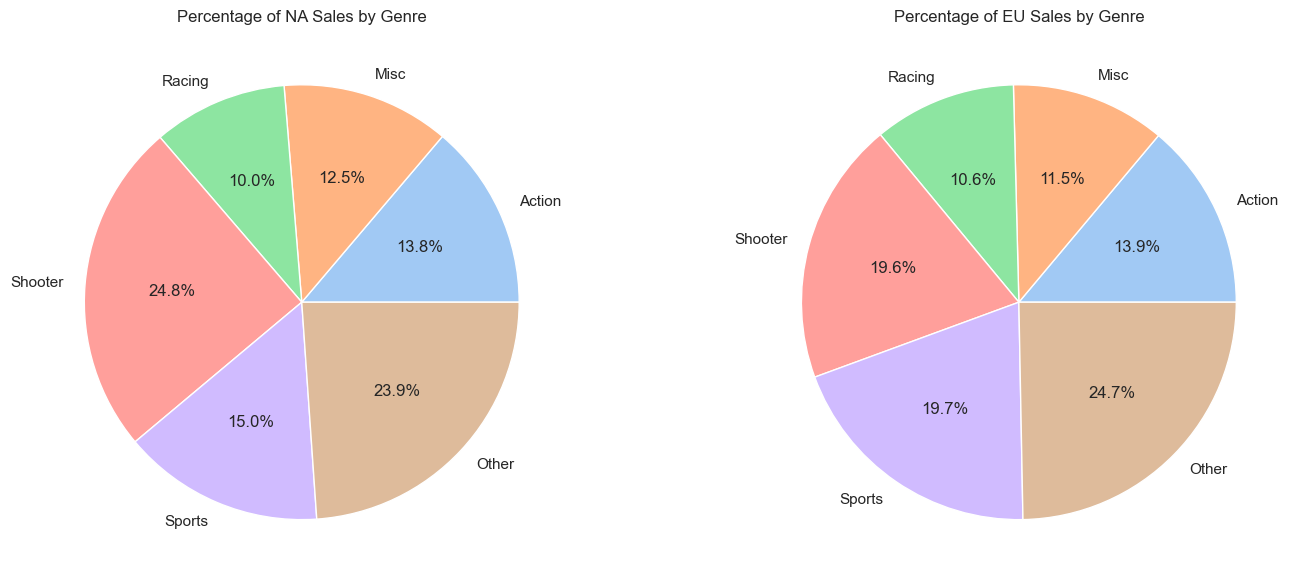

In [17]:
total_sales_na = game_sales['NA_Sales'].sum()
total_sales_eu = game_sales['EU_Sales'].sum()

total_genre_sales_na = game_sales.groupby('Genre')['NA_Sales'].sum()
total_genre_sales_eu = game_sales.groupby('Genre')['EU_Sales'].sum()

na_genre_percentage = ((total_genre_sales_na / total_sales_na) * 100).round(1)
eu_genre_percentage = ((total_genre_sales_eu / total_sales_eu) * 100).round(1)

# print(na_genre_percentage[na_genre_percentage < 10])
# print(eu_genre_percentage[eu_genre_percentage < 10])
na_genre_percentage['Other'] = na_genre_percentage[na_genre_percentage < 10].sum()
na_genre_percentage = na_genre_percentage[na_genre_percentage >= 10]

eu_genre_percentage['Other'] = eu_genre_percentage[eu_genre_percentage < 10].sum()
eu_genre_percentage = eu_genre_percentage[eu_genre_percentage >= 10]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].pie(na_genre_percentage, labels=na_genre_percentage.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of NA Sales by Genre')

axes[1].pie(eu_genre_percentage, labels=eu_genre_percentage.index, autopct='%1.1f%%')
axes[1].set_title('Percentage of EU Sales by Genre')

plt.tight_layout()
plt.show()

## NORTH AMERICAN & EUROPEAN SALES BY GENRE

We can see that the "Shooter" genre had a high percentage of sales in both NA and EU, and was the top seller in NA but EU actually sold slightly more "Sports" games. The "Other" category is comprised of "Fighting", "Platform", "Puzzle", "Role-Playing" and "Simulation" genres. All of these, in both regions had less than 10% global sales. 
___

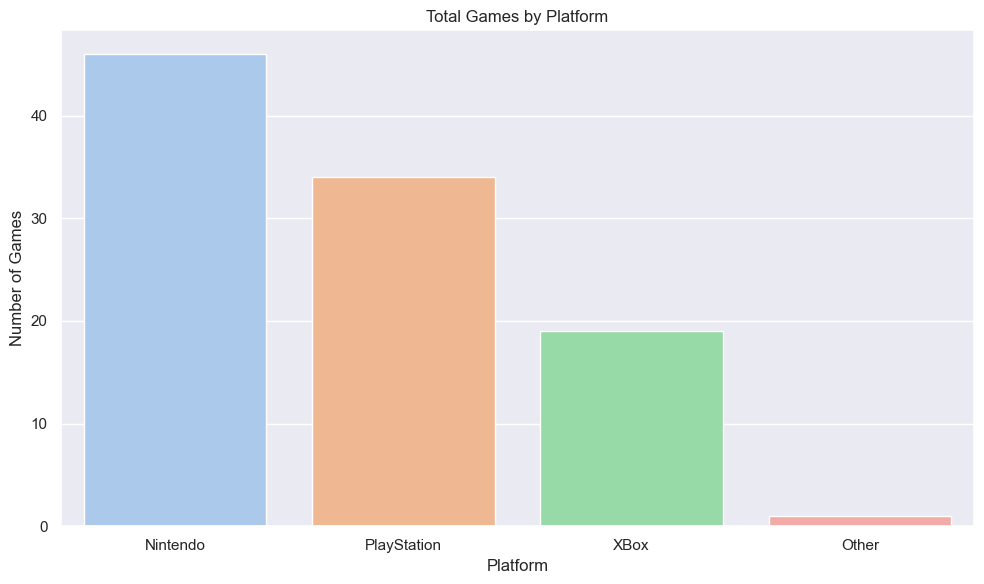

In [8]:
publisher_genre_counts = game_sales.groupby(['Platform']).size().reset_index(name='GameCount')
publisher_genre_counts = publisher_genre_counts.sort_values(by='GameCount', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=publisher_genre_counts, x='Platform', y='GameCount')
plt.ylabel('Number of Games')
plt.title('Total Games by Platform')
plt.tight_layout()
plt.show()

## COUNT OF GAMES BY PLATFORM

The chart shows that the Nintendo platform has created over double the amount of games than XBox and Playstation resides in the middle of both.
___

Text(0.5, 1.0, 'Most Present Genres')

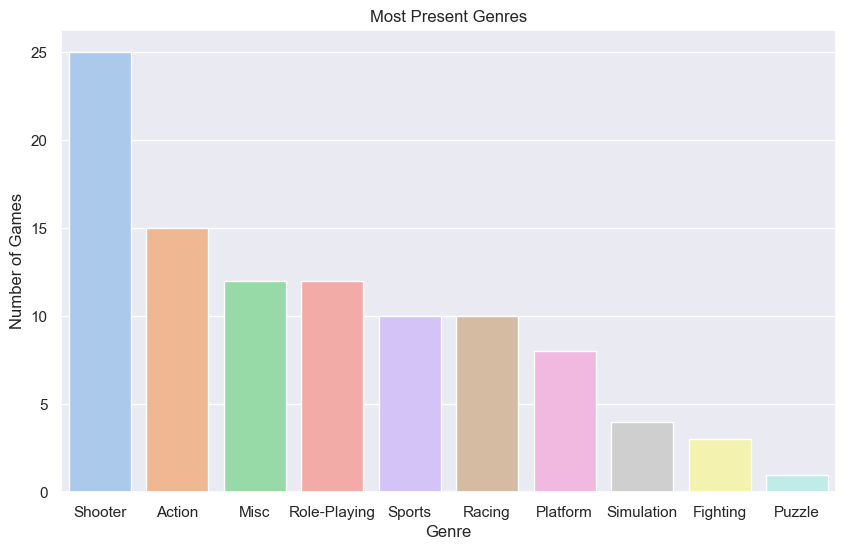

In [9]:
genre_counts = game_sales['Genre'].value_counts().sort_values(ascending=False)
genre_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Most Present Genres')

## MOST PRESENT GENRES IN TOP 100 GAMES

We can see that the Shooter genre towers over the other genres with 25, followed by Action with 15 and most hitting around 8-12.
___